<a href="https://colab.research.google.com/github/jumping2000/Quants/blob/main/correlation/Correlation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Correlazione tra Stocks e Bonds

**Il notebook permette di verificare, scaricando i dati da Yahoo Finance, la correlazione tra vari ETF.** <br>
"During periods when inflation was moderate, correlation was flat or negative and subsequently turned positive amid hyper/higher inflation environments. The reasoning behind these trends is explained by higher inflation directly triggering higher short-term rates and bond risk premiums, hurting bonds. Meanwhile, the negative effect on equities through the higher discount rate tends to outweigh positive changes in cash flow expectations."<br><br>

###Bibliografia:

*  https://www.capitalspectator.com/comparing-a-5-10-year-treasury-yield-to-stock-market-returns/

* https://www.franklintempleton.co.uk/articles/2023/brandywine-global/deconstructing-the-dynamic-duo-of-stocks-and-bonds

*  https://www.youtube.com/watch?v=mKiMmRZ8zWA&t=18s


<p>
<a href="https://colab.research.google.com/github/jumping2000/Quants/blob/master/correlation/Correlation_2.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://github.com/jumping2000/Quants/blob/main/correlation/Correlation_2.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>
</p>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import plotly.express as px
#plt.style.use("ggplot")

In [2]:
start_date = "2005-01-01"
end_date = "2024-09-01"
TRADING_DAYS = 252
n = 2 #anni per la rolling correlation
YEARS = 5 # anni per il rolling return
europe_analysis = True #False se guardiamo prodotti U.S.
use_matplot = True # se True uso matplotlib altrimenti plotly


In [3]:
#ETF
#
indici=[["SPDR S&P 500 ETF Trust","SPY"],["iShares 1-3 Year Treasury Bond","SHY"], ["iShares 7-10 Year Treasury Bond","IEF"], ["iShares 20+ Year Treasury Bond ETF","TLT"], ["SPDR Gold Shares","GLD"]]
nomi=list(np.array(indici)[:,0])
tickers=list(np.array(indici)[:,1])
################################################################################
dati=yf.download(tickers,start=start_date, end=end_date)["Adj Close"]
dati=dati.reindex(tickers, axis=1)
dati.ffill(limit=5,inplace=True) ## Riempio i buchi
################################################################################
dati.describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.90,0.95])

[*********************100%***********************]  5 of 5 completed


Ticker,SPY,SHY,IEF,TLT,GLD
count,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000
mean,202.967158,72.132973,82.096686,88.552218,125.754255
std,127.152857,6.198761,17.185914,26.601258,41.276096
min,50.701164,57.306694,49.938759,47.052151,41.259998
5%,79.108502,58.455855,51.788583,50.206734,51.608002
10%,83.932257,60.760681,53.509512,51.821026,64.144002
25%,98.461517,70.067451,67.215324,63.465260,103.150002
50%,165.287064,73.149475,86.674721,90.855034,123.010002
75%,269.626770,76.591988,93.062408,104.462807,161.360001
90%,413.969592,79.856888,104.121152,126.467332,177.284000


Formula per il rendimento annualizzato partendo dai rendimenti giornalieri: <br><br>
$$
\text{Annualized Return} = \left( \prod_{i=1}^{n} (1 + r_i) \right)^{\frac{252}{n}} - 1
$$
Formula semplificata (funziona bene se la volatilità dei rendimenti giornalieri non è eccessiva): <br><br>
$$
\text{Annualized Return} = \left( 1 + MeanReturn \right)^{252} - 1
$$

In [4]:
rendimenti = dati.pct_change().dropna()
###
rendimento_annualizzato = (1 + rendimenti).prod() ** (TRADING_DAYS / len(rendimenti)) - 1
print(f'Nel periodo {start_date} - {end_date}:')
print(" - Rendimento annualizzato in % - ",round(rendimento_annualizzato*100,2))
#VOLATILITA'
volatilita_giornaliera = rendimenti.std()
volatilita_annualizzata = volatilita_giornaliera * np.sqrt(TRADING_DAYS)
print(" - Volatilità annualizzata dei rendimenti giornalieri",round(volatilita_annualizzata*100,2))



Nel periodo 2005-01-01 - 2024-09-01:
 - Rendimento annualizzato in % -  Ticker
SPY    10.24
SHY     1.83
IEF     3.29
TLT     3.63
GLD     8.94
dtype: float64
 - Volatilità annualizzata dei rendimenti giornalieri Ticker
SPY    19.12
SHY     1.50
IEF     6.86
TLT    14.81
GLD    17.58
dtype: float64


In [5]:
# Calcolo i ROLLING RETURN il primo dato utile rappresenta il rendimento dei precedenti X (5 o 10 o altro) anni
def rolling_return_calc(returns, window):
    return (1 + returns.rolling(window=window).apply(lambda x: np.prod(1 + x)-1)).pow(TRADING_DAYS/window) - 1

rendimenti_rolling = rolling_return_calc(rendimenti, TRADING_DAYS*YEARS)
rendimenti_rolling.describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.90,0.95])

Ticker,SPY,SHY,IEF,TLT,GLD
count,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000
mean,0.108007,0.015302,0.038949,0.051693,0.068855
std,0.058192,0.011852,0.027184,0.040624,0.086876
min,-0.017193,0.003159,-0.015095,-0.059611,-0.082067
5%,0.000282,0.004255,-0.003091,-0.028486,-0.060251
10%,0.009045,0.004815,0.003221,-0.013053,-0.048940
25%,0.078037,0.006705,0.017979,0.031762,-0.005811
50%,0.122567,0.010511,0.037726,0.054661,0.068785
75%,0.150404,0.017302,0.057719,0.081474,0.111371
90%,0.171391,0.039894,0.078778,0.101598,0.204958


# Rendimenti rolling
* un punto sulla curva rappresenta il rendimento annualizzato dei precedenti N anni
* ogni curva rappresenta un asset

<Figure size 640x480 with 0 Axes>

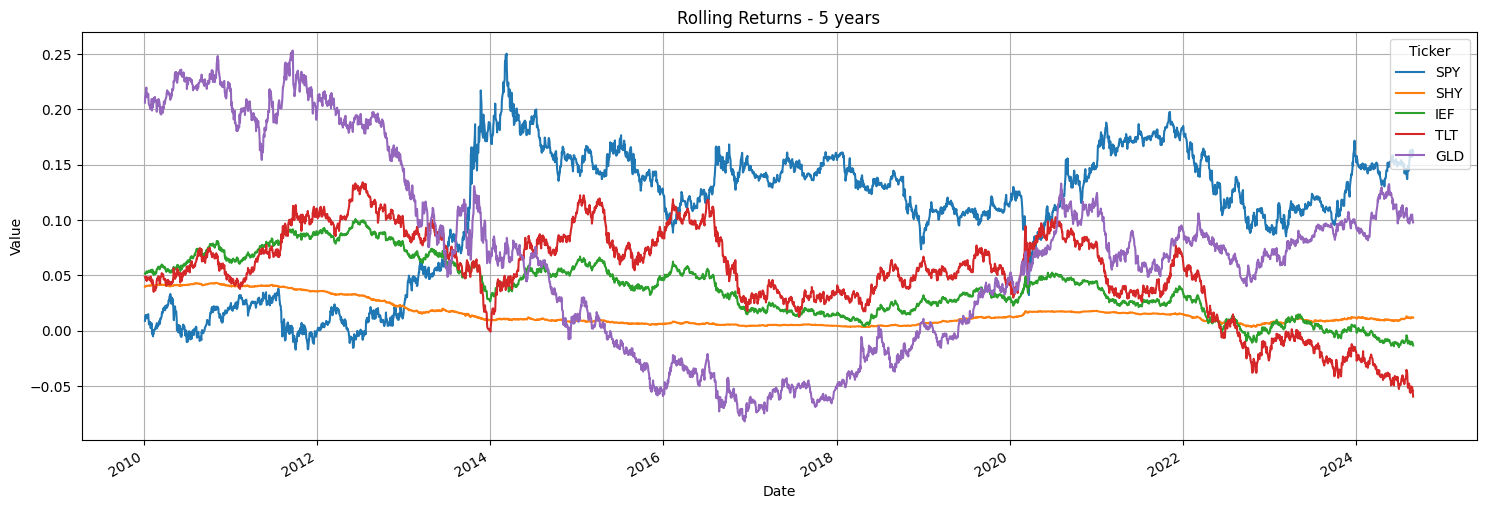

In [6]:
if use_matplot == True:
    fig = plt.figure()
    rendimenti_rolling.plot(figsize=(18,6))
    plt.title(f'Rolling Returns - {YEARS} years')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid()
    plt.show()
else:
    fig = px.line(
        data_frame=rendimenti_rolling,
        color_discrete_sequence=["#636EFA", "#EF553B", "#19D3F3", "#B6E880", "#FECB52", "#2ECB32","#FF6600","#0033CC"],
        template="plotly_dark",
    )
    fig.update_traces(hovertemplate=None)
    fig.update_layout(
        title=f'Rolling Returns - {YEARS} years',
        xaxis_title="Returns",
        yaxis_title="Value",
        hovermode="x unified",
        legend_title='Asset'
    )
    fig.show()

## Rolling correlation a 2 anni

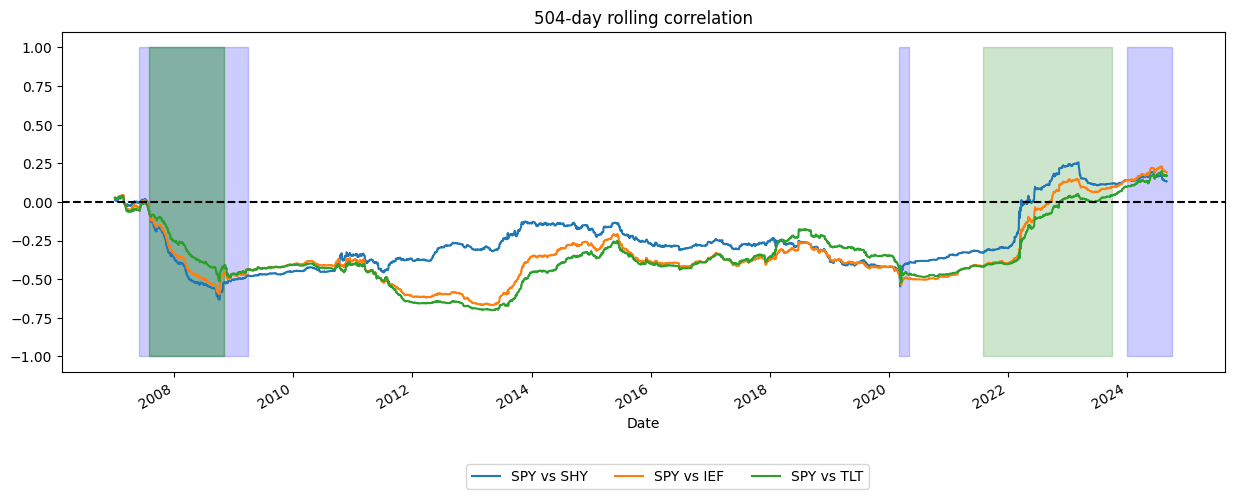

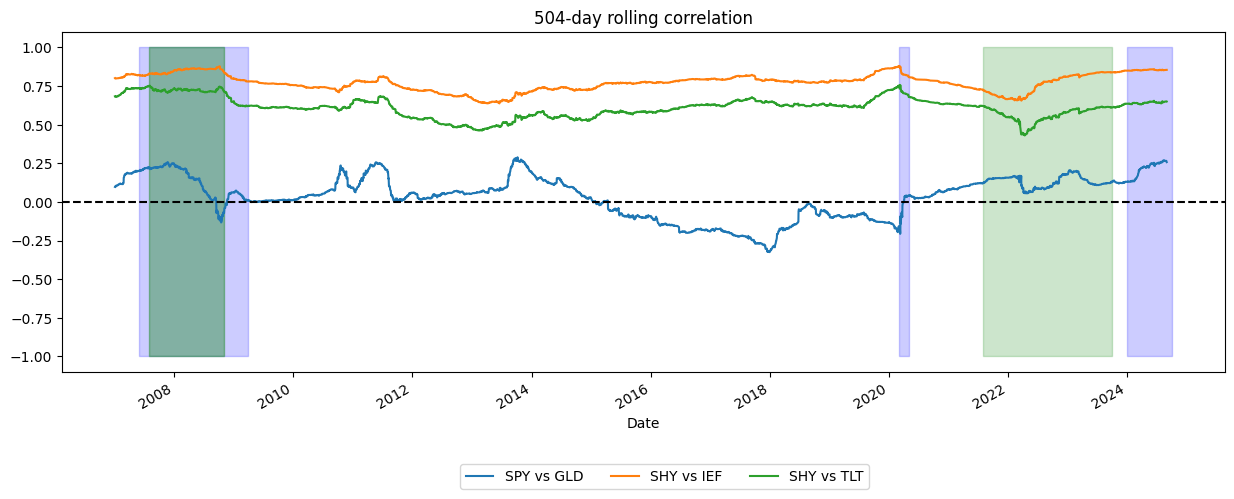

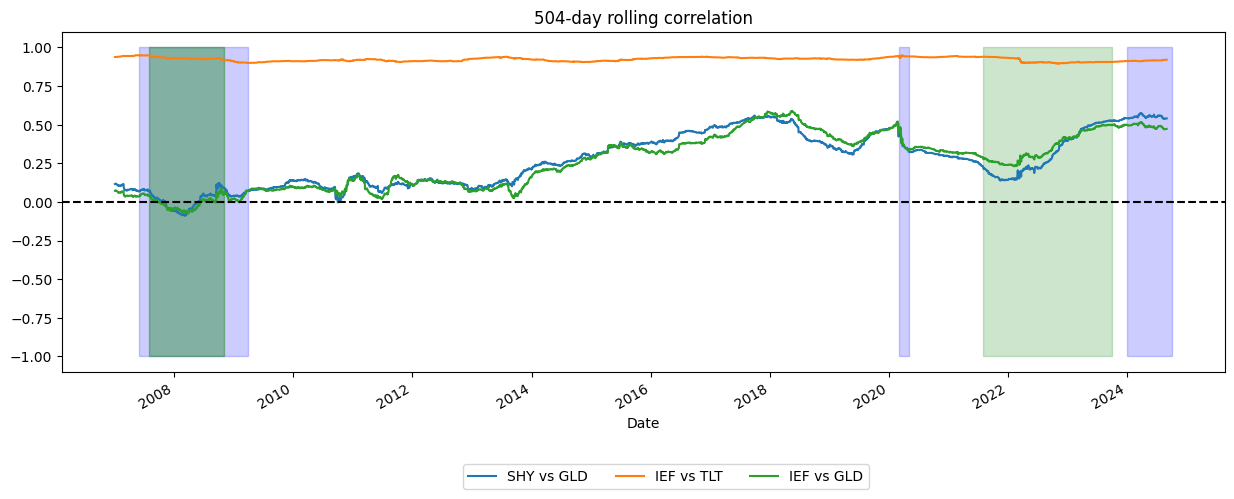

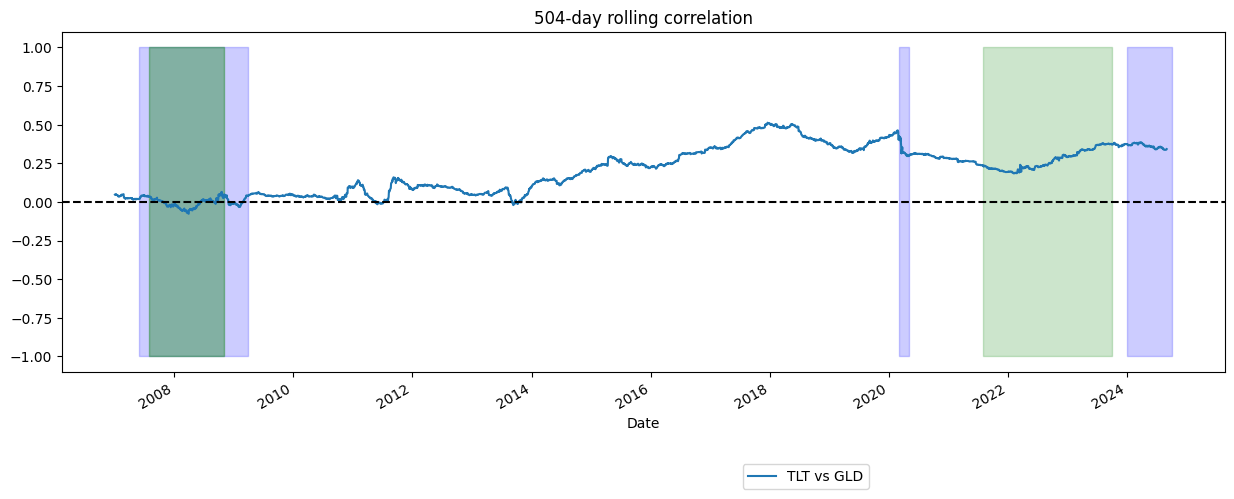

In [7]:
def rolling_correlation(pairs,returns,rolling_window,title):
    #res = pd.DataFrame()
    for pair in pairs:
        pair = list(pair)
        # select the first three letters of each name of the pair
        corr_name = f"{pair[0][:3]}_{pair[1][:3]}_corr"
        #res[corr_name] = returns[list(pair)].rolling(window=rolling_window).corr().iloc[0::2, -1].reset_index(drop=True)
        res = returns[pair[0]].rolling(window=rolling_window).corr(returns[pair[1]]).dropna()
        res.plot(title=title, figsize=(15, 5), label=' vs '.join(pair))
    plt.axhline(0, ls='--', color='black')
    for period in crisis_periods:
        plt.fill_between(period[:2], -1, 1, color='blue', alpha=.2)
    for period in inflation_periods:
        plt.fill_between(period[:2], -1, 1, color='green', alpha=.2)
    plt.legend(bbox_to_anchor=(0.7, -0.25), ncol=3)
    plt.show()
    return res

crisis_periods = [('2024-01-01', '2024-09-30', 'YTD'),
             ('2020-03-01', '2020-05-01', 'Pandemia'),
             ('2007-06-01', '2009-04-01', 'GFC')]
             #('1999-05-01', '2002-01-01', 'Dotcome bubble'),]

inflation_periods = []
if europe_analysis == True:
    inflation_periods = [('2007-08-01','2008-11-01','Superiore al 2%'),
                         ('2007-08-01','2008-11-01','Superiore al 2%'),
                      ('2021-08-01','2023-10-01','Superiore al 2%')]
                      #('1975-05-01', '1997-01-01', 'Superiore al 2%')]
else:
    inflation_periods = [('2007-11-01','2008-10-01','Superiore al 2%'),
                         ('2011-02-01','2012-04-01','Superiore al 2%'),
                      ('2021-08-01','2023-10-01','Superiore al 2%')]
                      #('1999-03-01', '2001-06-01', 'Superiore al 2%')]
                      #('2004-01-01', '2006-06-01', 'Superiore al 2%')]
                      #('1975-05-01', '1997-01-01', 'Superiore al 2%')]

import itertools as it
# omit timestamp-col
cols = list(dati.columns)[0:] ##:
ticker_pairs = list(it.combinations(cols, 2))
title = ''
###
#print(cols)
#print(ticker_pairs)
nrows = int(np.ceil(len(ticker_pairs)/3))
for i in range(nrows):
    pairs = ticker_pairs[i*3:(i+1)*3]
    title = f'{TRADING_DAYS*n}-day rolling correlation'
    rolling_corr = rolling_correlation(pairs, rendimenti, TRADING_DAYS*n , title)